In [104]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
# numpy, matplotlib.pyplot
%matplotlib inline
from sklearn.model_selection import train_test_split
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])


['NanumGothic']


In [41]:
(trainX, trainY), (testX, testY)=fashion_mnist.load_data()

In [70]:
testX.shape 
#만개의 이미지

(10000, 28, 28, 1)

In [43]:
trainX.shape

(60000, 28, 28)

In [44]:
pd.value_counts(trainY)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [45]:
classes = np.unique(trainY)
print(classes)
nClasses = len(classes)
print(nClasses)

[0 1 2 3 4 5 6 7 8 9]
10


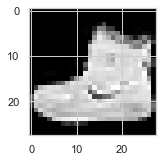

In [46]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(trainX[0,:,:], cmap='gray')

In [47]:
#이미지 데이터 전처리
"""
그레이 이미지 : 0~255, 28*28

"""
trainX = trainX.reshape(-1,28,28,1)
testX = testX.reshape(-1,28,28,1)


In [48]:
print(trainX.shape)
print(trainX)

(60000, 28, 28, 1)
[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
 

In [49]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX=trainX/255
testX=testX/255

In [50]:
trainYoneHot=to_categorical(trainY)
testYoneHot=to_categorical(testY)

In [51]:
#6만건 트레이닝-> 80:20 (트레이님, 검증)

In [52]:
trainX, validX, trainLabel, validLabel = train_test_split(trainX, trainYoneHot, test_size=0.2, random_state=2020)

In [53]:
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [71]:
batch_size = 64 # 64개 이미지 트레이닝할대마다 가중치 업데이트(모델 갱신 단위 )
epochs=20
num_classes = 10


In [55]:
fModel = Sequential() #모델 생성
"""
activation: 활성화 함수(linear, relu, sigmoid, softmax)를 지정한다.
-linear(default value) 입력값, *가중치로 계산된 결과가 그래도 출력 -> LeakyReLy (LeakyReLU를 활성화 함수로 쓰겠다)->
"""
#9*32=288
# 288+32(bias) =320
fModel.add(Conv2D(32, kernel_size=(3,3), 
                        activation='linear', padding ='same',
                        input_shape=(28, 28, 1))) #모델의 convolutional 계층을 추가한다. 
fModel.add(LeakyReLU(alpha=0.1)) #비 선형 의사결정
fModel.add(MaxPooling2D((2,2), padding='same')) # MaxPooling 
##############################################
fModel.add(Conv2D(64, kernel_size=(3,3), 
                        activation='linear', padding ='same',
                        )) #input_shape은 앞의 것과 동일 그래서 쓸 필요 없다 
fModel.add(LeakyReLU(alpha=0.1)) #비 선형 의사결정
fModel.add(MaxPooling2D((2,2), padding='same')) #2*2 풀링의 크기
##############################################
fModel.add(Conv2D(128, kernel_size=(3,3), 
                        activation='linear', padding ='same',
                        ))
fModel.add(LeakyReLU(alpha=0.1)) #비 선형 의사결정
fModel.add(MaxPooling2D((2,2), padding='same'))
##############
fModel.add(Flatten())
fModel.add(Dense(128, activation='linear'))
fModel.add(LeakyReLU(alpha=0.1))
#128개 입력 , 10개 출력)
fModel.add(Dense(num_classes, activation='softmax'))

In [56]:
fModel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)        

In [57]:
fModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
fTrain = fModel.fit(trainX,trainLabel, batch_size=batch_size, epochs=epochs, validation_data=(validX,validLabel))

Epoch 1/20
750/750 [==============================] - 33s 44ms/step - loss: 0.4737 - accuracy: 0.8260 - val_loss: 0.3459 - val_accuracy: 0.8778
Epoch 2/20
750/750 [==============================] - 34s 45ms/step - loss: 0.2921 - accuracy: 0.8933 - val_loss: 0.2878 - val_accuracy: 0.8953
Epoch 3/20
750/750 [==============================] - 34s 45ms/step - loss: 0.2422 - accuracy: 0.9099 - val_loss: 0.2663 - val_accuracy: 0.9052
Epoch 4/20
750/750 [==============================] - 36s 47ms/step - loss: 0.2091 - accuracy: 0.9216 - val_loss: 0.2415 - val_accuracy: 0.9147
Epoch 5/20
750/750 [==============================] - 37s 50ms/step - loss: 0.1842 - accuracy: 0.9306 - val_loss: 0.2364 - val_accuracy: 0.9153
Epoch 6/20
750/750 [==============================] - 34s 45ms/step - loss: 0.1586 - accuracy: 0.9395 - val_loss: 0.2242 - val_accuracy: 0.9215
Epoch 7/20
750/750 [==============================] - 36s 48ms/step - loss: 0.1367 - accuracy: 0.9485 - val_loss: 0.2359 - val_accuracy:

In [59]:
testEval =fModel.evaluate(testX, testYoneHot)
print("cost: ", testEval[0])
print("accuracy: ", testEval[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.4870 - accuracy: 0.9189
cost:  0.4870310127735138
accuracy:  0.9189000129699707


In [63]:
accuracy=fTrain.history['accuracy']
val_accuracy=fTrain.history['val_accuracy']
loss=fTrain.history['loss']
val_loss=fTrain.history['val_loss']
epochs=range(len(accuracy))

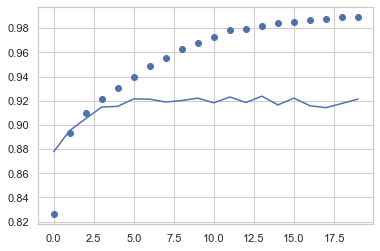

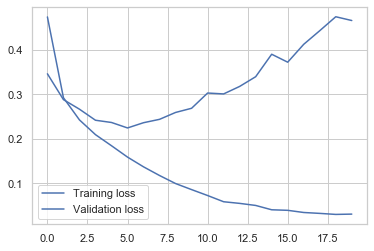

In [64]:
plt.plot(epochs, accuracy, 'bo',label='Training Acc')
plt.plot(epochs, val_accuracy, 'b',label='Validation Acc')

plt.figure()
plt.plot(epochs, loss, 'b',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.legend()
plt.show()

In [62]:
#오버피팅 방지 dropout
#학습노드(뉴런, 퍼셉트론) 의 일부(랜덤)를 학습에서 제외

In [66]:
fModel = Sequential() #모델 생성

fModel.add(Conv2D(32, kernel_size=(3,3), 
                        activation='linear', padding ='same',
                        input_shape=(28, 28, 1))) #모델의 convolutional 계층을 추가한다. 
fModel.add(LeakyReLU(alpha=0.1)) #비 선형 의사결정
fModel.add(MaxPooling2D((2,2), padding='same')) # MaxPooling 

fModel.add(Dropout(0.25)) #75% 만큼의 웨이트만 
##############################################
fModel.add(Conv2D(64, kernel_size=(3,3), 
                        activation='linear', padding ='same',
                        )) #input_shape은 앞의 것과 동일 그래서 쓸 필요 없다 
fModel.add(LeakyReLU(alpha=0.1)) #비 선형 의사결정
fModel.add(MaxPooling2D((2,2), padding='same')) #2*2 풀링의 크기

fModel.add(Dropout(0.25)) 
##############################################
fModel.add(Conv2D(128, kernel_size=(3,3), 
                        activation='linear', padding ='same',
                        ))
fModel.add(LeakyReLU(alpha=0.1)) #비 선형 의사결정
fModel.add(MaxPooling2D((2,2), padding='same'))

fModel.add(Dropout(0.4)) 
###########################################
fModel.add(Flatten())
fModel.add(Dense(128, activation='linear'))
fModel.add(LeakyReLU(alpha=0.1))

fModel.add(Dropout(0.3)) 

#128개 입력 , 10개 출력)
fModel.add(Dense(num_classes, activation='softmax'))

In [72]:

fModel.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
fTrain_Dropout=fModel.fit(trainX, trainLabel, 
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(validX, validLabel))

Epoch 1/20
750/750 [==============================] - 39s 52ms/step - loss: 0.5944 - accuracy: 0.7802 - val_loss: 0.3685 - val_accuracy: 0.8669
Epoch 2/20
750/750 [==============================] - 40s 53ms/step - loss: 0.3746 - accuracy: 0.8622 - val_loss: 0.3110 - val_accuracy: 0.8879
Epoch 3/20
750/750 [==============================] - 40s 53ms/step - loss: 0.3287 - accuracy: 0.8781 - val_loss: 0.2821 - val_accuracy: 0.8942
Epoch 4/20
750/750 [==============================] - 39s 52ms/step - loss: 0.3013 - accuracy: 0.8880 - val_loss: 0.2610 - val_accuracy: 0.9027
Epoch 5/20
750/750 [==============================] - 39s 51ms/step - loss: 0.2802 - accuracy: 0.8965 - val_loss: 0.2847 - val_accuracy: 0.8944
Epoch 6/20
750/750 [==============================] - 40s 53ms/step - loss: 0.2687 - accuracy: 0.9004 - val_loss: 0.2375 - val_accuracy: 0.9118
Epoch 7/20
750/750 [==============================] - 38s 50ms/step - loss: 0.2548 - accuracy: 0.9051 - val_loss: 0.2640 - val_accuracy:

In [73]:
fModel.save("fModelDropout.h5")
#모델 저장 : 케라스에서는 확장자 

In [74]:
#저장한 모델 불러오기
from keras.models import load_model
myModel=load_model("fModelDropout.h5")

#분류결과 = myModel.predict_classes(입력데이터)

In [76]:
testEval=fModel.evaluate(testX,testYoneHot)
print(testEval[0])
print(testEval[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2219 - accuracy: 0.9193
0.22190868854522705
0.9193000197410583


In [77]:
accuracy=fTrain_Dropout.history['accuracy']
val_accuracy=fTrain_Dropout.history['val_accuracy']
loss=fTrain_Dropout.history['loss']
val_loss=fTrain_Dropout.history['val_loss']
epochs=range(len(accuracy))

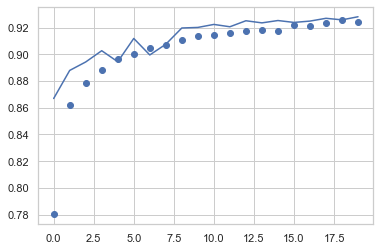

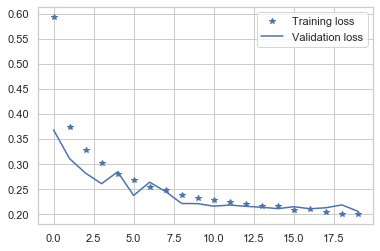

In [83]:
plt.plot(epochs, accuracy, 'bo',label='Training Acc')
plt.plot(epochs, val_accuracy, 'b',label='Validation Acc')

plt.figure()
plt.plot(epochs, loss, 'b*',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.legend()
plt.show()

In [106]:
predictedClasses =fModel.predict(testX)

In [107]:
predictedClasses=np.argmax(np.round(predictedClasses), axis=1)

In [108]:
print(predictedClasses)
print(testY)
correct = np.where(predictedClasses==testY)[0]
correct

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

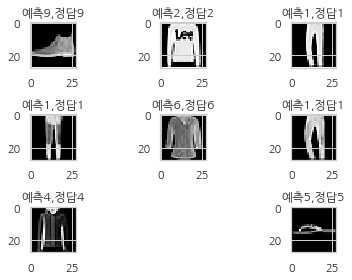

In [109]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[correct].reshape(28,28), cmap='gray')
    plt.title("예측{},정답{}".format(predictedClasses[correct],testY[correct]))
    plt.tight_layout()